# Perceptron multicouches et Keras

Définition d'un perceptron multicouches à deux couches cachées pour la classification de données MNIST


## MNIST

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)




# Import

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk
from tensorflow.keras import Sequential


from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [9]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0]
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1]
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# normalisation



print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Réseau

## Paramètres du réseau

Dans un premier temps, on définit les paramètres du réseau :
- 256 neurones cachés dans chaque couche cachée,
- un apprentissage par batchs de taille 100
- 15 itérations pour l'apprentissage


In [10]:

lr = 0.001
num_epochs = 15
batch_size = 100

# Nombre de neurones sur les deux couches cachées
num_hidden_1 = 256
num_hidden_2 = 256

## Définition du réseau

On construit alors le modèle :
- le réseau
- la fonction de coût à optimiser : dans le cas d'un problème de classification, la fonction d'entropie croisée calculée entre la sortie théorique et la sortie calculée par le modèle est adéquate
- la méthode d'optimisation utilisée (descente de gradient) : ici, l'algorithme [ADAM](https://arxiv.org/abs/1412.6980) est utilisé

In [11]:
#TODO : réseau
model = Sequential()
#input_dim = 784 car image 28*28, on devrait Flatten la shape de l'image du genre:
#model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=num_hidden_1, input_dim=784, activation='ReLU'))
model.add(Dense(units=num_hidden_2,  activation='ReLU'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#To custom learning rate
# Define your desired learning rate
#custom_learning_rate = 0.001  # You can change this to your preferred value

# Create an instance of the Adam optimizer with the custom learning rate
#custom_optimizer = tf.keras.optimizers.Adam(learning_rate=custom_learning_rate)

# Create the sequential model
#model = Sequential()

# Add a Dense layer with softmax activation
#model.add(Dense(units=num_classes, input_dim=input_dim, activation='softmax'))

# Compile the model with the custom optimizer
#model.compile(loss='categorical_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


On entraîne le modèle

In [12]:
#TODO ;: entraînement
# Entraînement sur les données x_train l'image et y_train la classi attendu (supervisé)
hist=model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size,verbose=0)


Puis on l'évalue sur l'ensemble de test

313/313 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9792


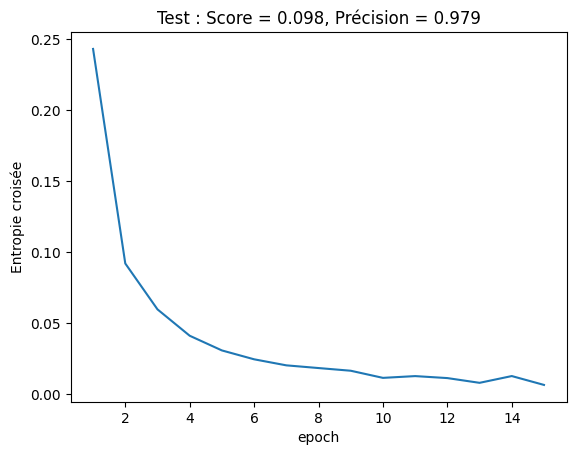

313/313 [==============================] - 1s 2ms/step
Nombre d'erreurs 208/10000




<Figure size 640x480 with 0 Axes>

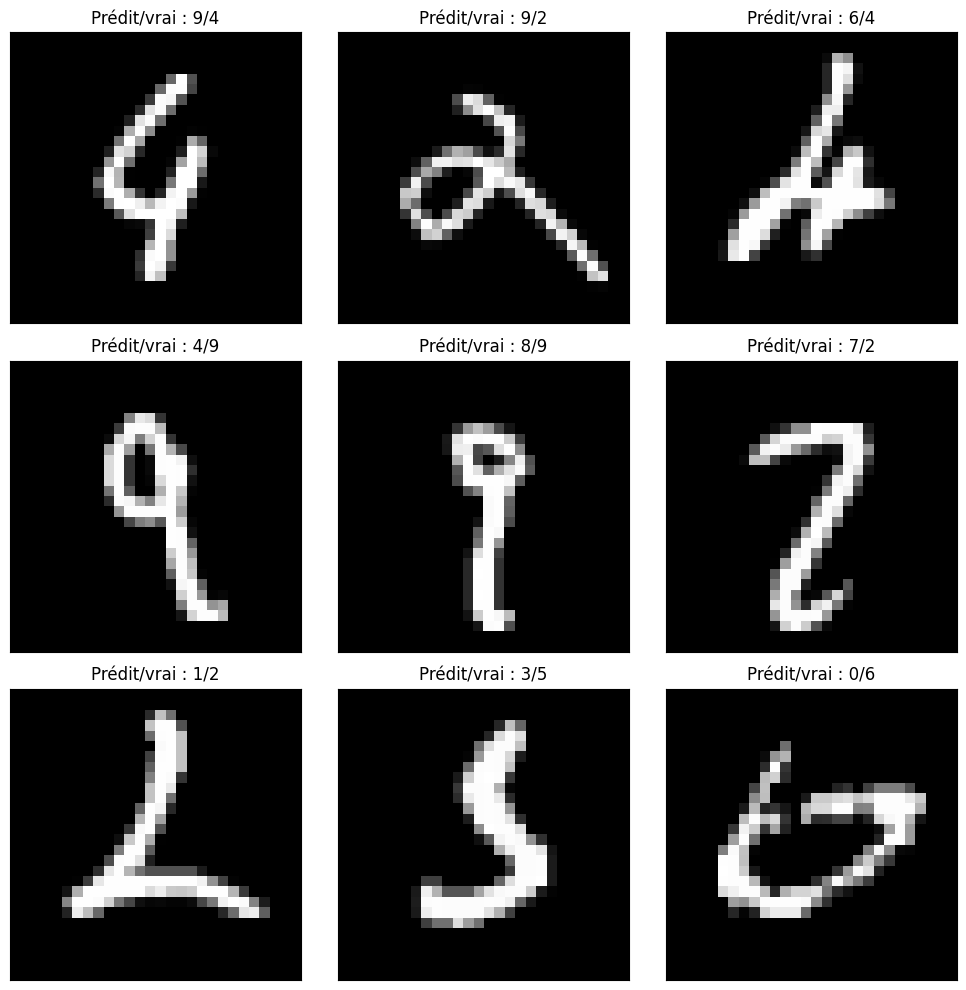

In [13]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
